In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
names = open('Indian_Names_Cleaned.txt', 'r').read().splitlines()

In [ ]:
chars = sorted(list(set(''.join(names))))
stoi = { s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0;
itos = { i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3 # context length = how many letters needed to predict the next one
X, Y = [], []

for n in names:
  # print(n)
  context = [0] * block_size
  # print(context)
  for ch in n + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]
    # print("HIIIIIIIIIIIIIII", ix)
    # print("xxxxxx", X)
    # print("yyyyyy", Y)

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([33, 3]), torch.int64, torch.Size([33]), torch.int64)

In [ ]:
C = torch.randn((27, 2))

In [ ]:
C[X]

tensor([[[ 1.6722,  0.0652],
         [ 1.6722,  0.0652],
         [ 1.6722,  0.0652]],

        [[ 1.6722,  0.0652],
         [ 1.6722,  0.0652],
         [ 0.8030, -0.0282]],

        [[ 1.6722,  0.0652],
         [ 0.8030, -0.0282],
         [ 0.8030, -0.0282]],

        [[ 0.8030, -0.0282],
         [ 0.8030, -0.0282],
         [ 0.3151,  0.3566]],

        [[ 0.8030, -0.0282],
         [ 0.3151,  0.3566],
         [ 0.0308, -1.5833]],

        [[ 0.3151,  0.3566],
         [ 0.0308, -1.5833],
         [-1.3997,  0.0090]],

        [[ 1.6722,  0.0652],
         [ 1.6722,  0.0652],
         [ 1.6722,  0.0652]],

        [[ 1.6722,  0.0652],
         [ 1.6722,  0.0652],
         [ 0.8030, -0.0282]],

        [[ 1.6722,  0.0652],
         [ 0.8030, -0.0282],
         [ 0.8030, -0.0282]],

        [[ 0.8030, -0.0282],
         [ 0.8030, -0.0282],
         [ 0.3151,  0.3566]],

        [[ 0.8030, -0.0282],
         [ 0.3151,  0.3566],
         [ 0.0308, -1.5833]],

        [[ 0.3151,  0

In [ ]:
emb = C[X]
emb.shape

torch.Size([33, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
B1 = torch.randn(100)
# 100 is not a fixed number its a hyper parameter that can be tuned for accuracy
# it defines the dimension of the model(neurons)

In [ ]:
# activation function is: tanh(x) this introduces non-linearity
h = torch.tanh(emb.view(-1, 6) @ W1 + B1)
# (emb.view(-1, 6) @ W1 + B1)this gives the raw outputs of a neural network layer before applying an activation funtion which are called logits
# to convert these logits into probabilities we use softax
# these logits are used in loss functions
# tanh maps values to (-1, 1)

In [ ]:
h

tensor([[ 0.7542,  0.9983,  0.9967,  ..., -0.6440, -0.8992,  0.9998],
        [ 0.8377,  0.9983,  0.9926,  ..., -0.8850, -0.7739,  0.9989],
        [ 0.7677,  0.9713,  0.9615,  ..., -0.7133, -0.9231,  0.9998],
        ...,
        [ 0.9195,  0.9167,  0.8843,  ..., -0.9602,  0.1754,  0.8319],
        [-0.8224, -0.7949, -0.9162,  ...,  0.1296, -0.9992,  0.9994],
        [-0.4072, -0.1414,  0.7264,  ...,  0.9664, -0.8372, -0.9628]])

In [ ]:
h.shape

torch.Size([33, 100])

In [ ]:
W2 = torch.randn([100, 27])
B2 = torch.randn(27)

In [ ]:
logits = h @ W2 + B2

In [ ]:
logits.shape

torch.Size([33, 27])

In [ ]:
logits

tensor([[ 2.1968e+00,  7.1301e-01, -5.4885e+00,  7.8124e+00,  1.0473e+01,
         -7.2343e+00, -1.1775e+01, -2.7510e+00, -3.1728e+00, -1.1681e+01,
         -1.1079e+01,  1.1673e+01,  1.4114e+00,  1.3003e+00, -9.7726e+00,
         -1.4181e+01,  1.2270e+01,  7.7338e+00,  7.4340e+00, -3.5174e+00,
         -6.3772e+00,  6.5945e+00,  5.8302e+00, -7.4267e-01, -7.8331e+00,
          1.3334e+00, -4.4661e-01],
        [-1.3162e+00, -1.3295e+00, -5.4533e+00,  5.8428e+00,  9.8262e+00,
         -4.3788e+00, -5.0454e+00, -7.5235e+00, -3.1828e+00, -5.7895e+00,
         -7.5384e+00,  1.2654e+01,  5.9349e+00, -7.5942e+00, -6.4174e+00,
         -9.3636e+00,  1.5864e+01,  6.0636e+00,  8.1065e+00, -1.6984e+00,
         -9.6122e+00,  5.1465e+00,  4.4910e+00, -2.8709e+00, -9.2476e+00,
          4.0633e+00,  1.2844e+00],
        [ 1.2164e+00, -7.8573e-01, -3.5057e+00,  5.0144e+00,  6.1671e+00,
         -6.2899e-01, -7.2803e+00, -1.3583e+01,  7.6066e-01,  6.3593e-01,
         -1.1340e+01,  1.4733e+01,  2.20

In [ ]:
counts = logits.exp()
# normalizes: negative values to lesser than 1 and positive to greater than 1

In [ ]:
probs = counts / counts.sum(1, keepdims=True)
# sums along dimension 1 i.e. across each row
# keepsdim = True: keeps the summed dimension same as the input dimension

In [ ]:
Y

tensor([ 1,  1,  2,  9,  4,  0,  1,  1,  2,  9,  4,  1,  0,  1,  1,  3,  8,  1,
        12,  0,  1,  1,  4,  5, 19,  8,  0,  1,  1,  4,  9, 12,  0])

In [ ]:
torch.arange(33)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [ ]:
loss = -probs[torch.arange(33), Y].log().mean()

In [ ]:
loss

tensor(17.2800)

Forward pass

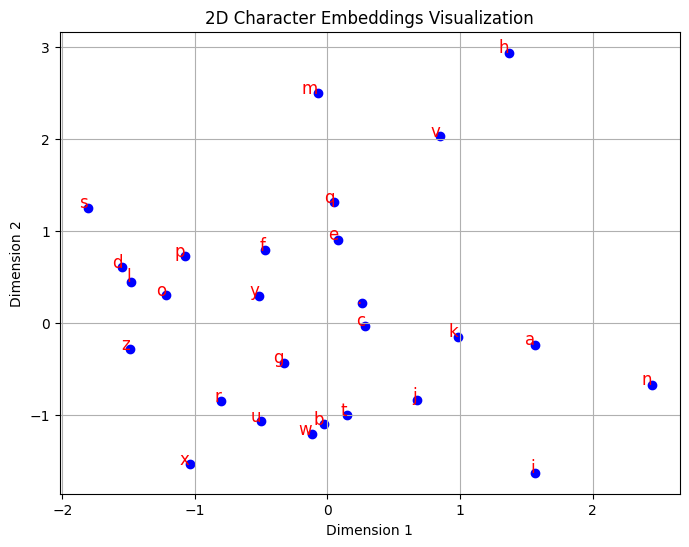

In [ ]:
import torch
import matplotlib.pyplot as plt

# Set random seed for reproducibility
g = torch.Generator().manual_seed(2147483647)

# Generate random 2D embeddings for 27 characters (a-z and '.')
C = torch.randn((27, 2), generator=g)

# Character list (a-z and '.')
chars = list("abcdefghijklmnopqrstuvwxyz.")

# Extract x and y coordinates from embedding matrix
x_coords = C[:, 0].tolist()
y_coords = C[:, 1].tolist()

# Plot embeddings
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color="blue")

# Add character labels
for i, char in enumerate(chars):
    plt.text(x_coords[i], y_coords[i], char, fontsize=12, ha='right', color="red")

# Set title and axis labels
plt.title("2D Character Embeddings Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
g = torch.Generator().manual_seed(4)
c = torch.randn((27, 2), generator=g)
W1 = torch.randn([6, 100], generator=g)
W2 = torch.randn((100, 27), generator=g)
B2 = torch.randn(27, generator=g)
parameters = [c, W1, B1, W2, B2]

In [ ]:
sum(p.nelement() for p in parameters) # number os parameters in total

3481

In [ ]:
emb = c[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + B1) #(33, 100)
logits = h @ W2 + B2 #(33, 27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = - prob[torch.arange(33), Y].log().mean()
# instead of all this we can directly convert logits into loss using cross entropy function
loss = F.cross_entropy(logits, Y)
# why this is prefered?
# because less tensors are made hence memory is less used
# very efficient for back propogation as they have fused kernels and simpler mathematical operations
loss

tensor(13.4594, grad_fn=<NllLossBackward0>)

Backward Pass

In [ ]:
for p in parameters:
  p.requires_grad_(True)

In [ ]:
for p in parameters:
  # print(p.requires_grad)
  p.grad = None # setting gradients to zero
  # p.requires_grad_(True).

# for p in parameters:
#     if p.grad is not None:  # Only reset if gradients exist
#         p.grad.zero_()
loss.backward()

Update

In [ ]:
# for p in parameters:
#   p.data += -0.1 + p.grad
# #the number added to p.grad is the learning rate

learning_rate = 0.1
for p in parameters:
    if p.grad is not None:  # Prevent NoneType error
        p.data -= learning_rate * p.grad

Doubts

In [ ]:
probs.shape

torch.Size([33, 27])

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([33, 6])

In [ ]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([33, 6])

In [ ]:
a = torch.arange(18)
a.view(3, 3, 2) # until and unless the multiplication of the numbers equal 18 it can be embedded anyways

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])